#### SQLite + Python Basics (Week 9 – Python + SQL)


##### 1. Introduction


##### SQLite + Python Basics

This notebook introduces how to use SQLite in Python using the built-in `sqlite3` module.  
You'll learn to:

- Create and connect to a database
- Create tables
- Insert, update, delete, and query data
- Perform joins and aggregations
- Export SQL query results into Pandas

All operations use the Pythonic `with` context manager for automatic commit and cleanup.


##### 2. Setup


In [1]:
import sqlite3
import pandas as pd
print("SQLite version",sqlite3.sqlite_version)

SQLite version 3.49.1


##### 3. Create Database and Tables


In [2]:
with sqlite3.connect("ecommerce.db") as conn:
    cur = conn.cursor()
    
    cur.execute("""
    CREATE TABLE IF NOT EXISTS customers(
        customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT,
        last_name TEXT,
        email TEXT UNIQUE,
        city TEXT,
        region TEXT,
        created_at TEXT DEFAULT CURRENT_TIMESTAMP
    );
    """)
    
    cur.execute("""
    CREATE TABLE IF NOT EXISTS orders(
        order_id INTEGER PRIMARY KEY AUTOINCREMENT,
        customer_id INTEGER,
        order_date TEXT,
        product_name TEXT,
        quantity INTEGER CHECK(quantity > 0),
        price REAL,
        status TEXT,
        FOREIGN KEY(customer_id) REFERENCES customers(customer_id)
    );
    """)

print("✅ Tables created successfully.")


✅ Tables created successfully.


##### 4. Insert Sample Data


In [3]:
customers = [
    ("Daniel", "Masila", "daniel@example.com", "Nairobi", "Central"),
    ("Jane", "Mwangi", "jane@example.com", "Nakuru", "Rift Valley"),
    ("John", "Otieno", "john@example.com", "Kisumu", "Western"),
    ("Lucy", "Kamau", "lucy@example.com", "Mombasa", "Coast")
]

orders = [
    (1, "2025-10-01", "Wireless Mouse", 2, 1200, "Delivered"),
    (1, "2025-10-03", "Keyboard", 1, 2000, "Delivered"),
    (2, "2025-10-04", "Laptop Stand", 1, 3500, "Shipped"),
    (3, "2025-10-05", "HDMI Cable", 3, 800, "Pending"),
    (4, "2025-10-06", "Monitor 24 inch", 1, 16000, "Delivered")
]

with sqlite3.connect("ecommerce.db") as conn:
    cur = conn.cursor()
    cur.executemany("""
    INSERT INTO customers (first_name, last_name, email, city, region)
    VALUES (?, ?, ?, ?, ?)
    """, customers)
    
    cur.executemany("""
    INSERT INTO orders (customer_id, order_date, product_name, quantity, price, status)
    VALUES (?, ?, ?, ?, ?, ?)
    """, orders)

print("✅ Data inserted successfully.")


✅ Data inserted successfully.


##### 5. Read and display data


In [4]:
with sqlite3.connect('ecommerce.db') as conn:
    cur = conn.cursor()
    cur.execute("SELECT * FROM customers")
    for row in cur.fetchall():
        print(row)

(1, 'Daniel', 'Masila', 'daniel@example.com', 'Nairobi', 'Central', '2025-10-14 15:03:21')
(2, 'Jane', 'Mwangi', 'jane@example.com', 'Nakuru', 'Rift Valley', '2025-10-14 15:03:21')
(3, 'John', 'Otieno', 'john@example.com', 'Kisumu', 'Western', '2025-10-14 15:03:21')
(4, 'Lucy', 'Kamau', 'lucy@example.com', 'Mombasa', 'Coast', '2025-10-14 15:03:21')


##### 6. Joins and aggregation


In [5]:
query = """
SELECT c.first_name, c.city, o.product_name, 
       o.quantity, o.price, 
       (o.quantity * o.price) AS total_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id;
"""

with sqlite3.connect("ecommerce.db") as conn:
    df = pd.read_sql_query(query, conn)

df


,first_name,city,product_name,quantity,price,total_value
0,Daniel,Nairobi,Wireless Mouse,2,1200.0,2400.0
1,Daniel,Nairobi,Keyboard,1,2000.0,2000.0
2,Jane,Nakuru,Laptop Stand,1,3500.0,3500.0
3,John,Kisumu,HDMI Cable,3,800.0,2400.0
4,Lucy,Mombasa,Monitor 24 inch,1,16000.0,16000.0


##### 7. Analytical Query Example


<Axes: title={'center': 'Total Sales by Region'}, xlabel='region'>

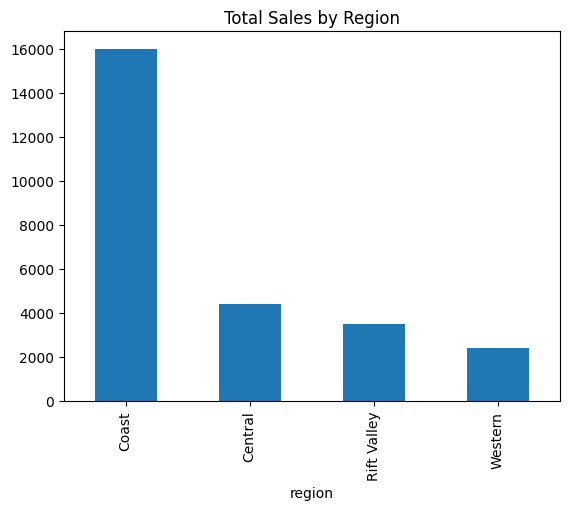

In [6]:
query = """
SELECT c.region, SUM(o.quantity * o.price) AS total_sales
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.region
ORDER BY total_sales DESC;
"""

with sqlite3.connect("ecommerce.db") as conn:
    sales_by_region = pd.read_sql_query(query, conn)

sales_by_region.plot(kind="bar", x="region", y="total_sales", legend=False, 
                     title="Total Sales by Region")


##### 8. Update and delete


In [7]:
with sqlite3.connect("ecommerce.db") as conn:
    cur = conn.cursor()
    
    # Update
    cur.execute("UPDATE orders SET status='Delivered' WHERE status='Pending';")
    
    # Delete example
    cur.execute("DELETE FROM orders WHERE status='Cancelled';")

print("✅ Orders updated and cleaned up.")


✅ Orders updated and cleaned up.


##### 9. Export Query to CSV


In [8]:
with sqlite3.connect('ecommerce.db') as conn:
    df = pd.read_sql_query("SELECT * FROM orders",conn)
df.to_csv("orders_export.csv",index=False)
print("✅ Exported to orders_export.csv")

✅ Exported to orders_export.csv


##### 10. Summary


We learned to:

- Create and manage a SQLite database in Python
- Use the `with` context for safe connection handling
- Insert, update, delete, and query records
- Perform joins and aggregations
- Export results directly into Pandas and CSV

Next: Connect to PostgreSQL using `psycopg2` or use `SQLAlchemy` ORM.
